In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

In [98]:
from google.colab import files
uploaded = files.upload()


Saving hotel_bookings.csv to hotel_bookings (2).csv


In [99]:
df = pd.read_csv("hotel_bookings.csv")


#EDA

In [100]:
df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [101]:
df.shape

(119390, 32)

In [102]:
df.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,...,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,...,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

###**Duplicates**  
   - Found some duplicate rows that may need removal.

In [104]:
df.duplicated().sum()

np.int64(31994)

In [105]:
df=df.drop_duplicates()

In [106]:
df.shape

(87396, 32)

###**Missing Values**  
   - High missingness in `company` and `agent`.  
   - Low missingness in other columns.  

In [107]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


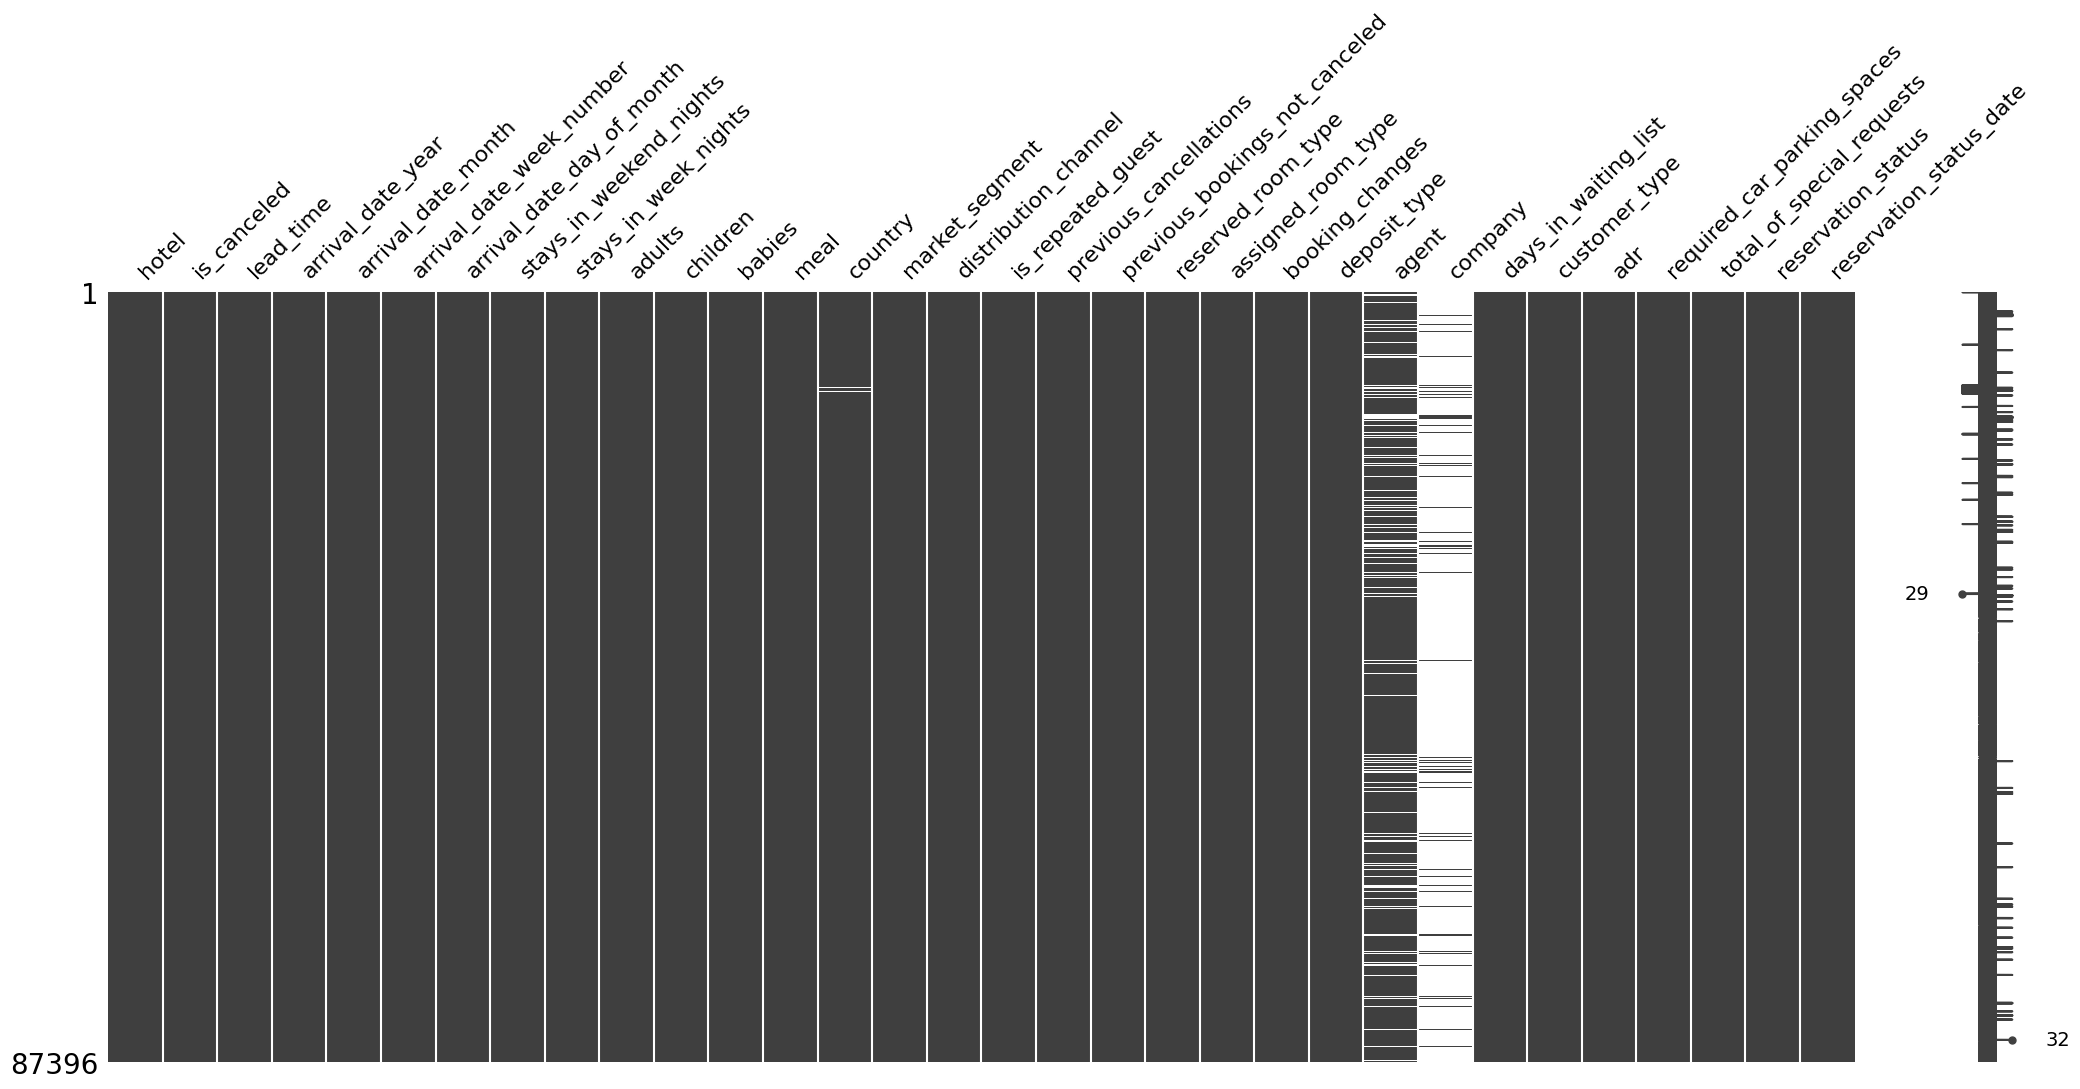

In [108]:
msno.matrix(df)
plt.show()


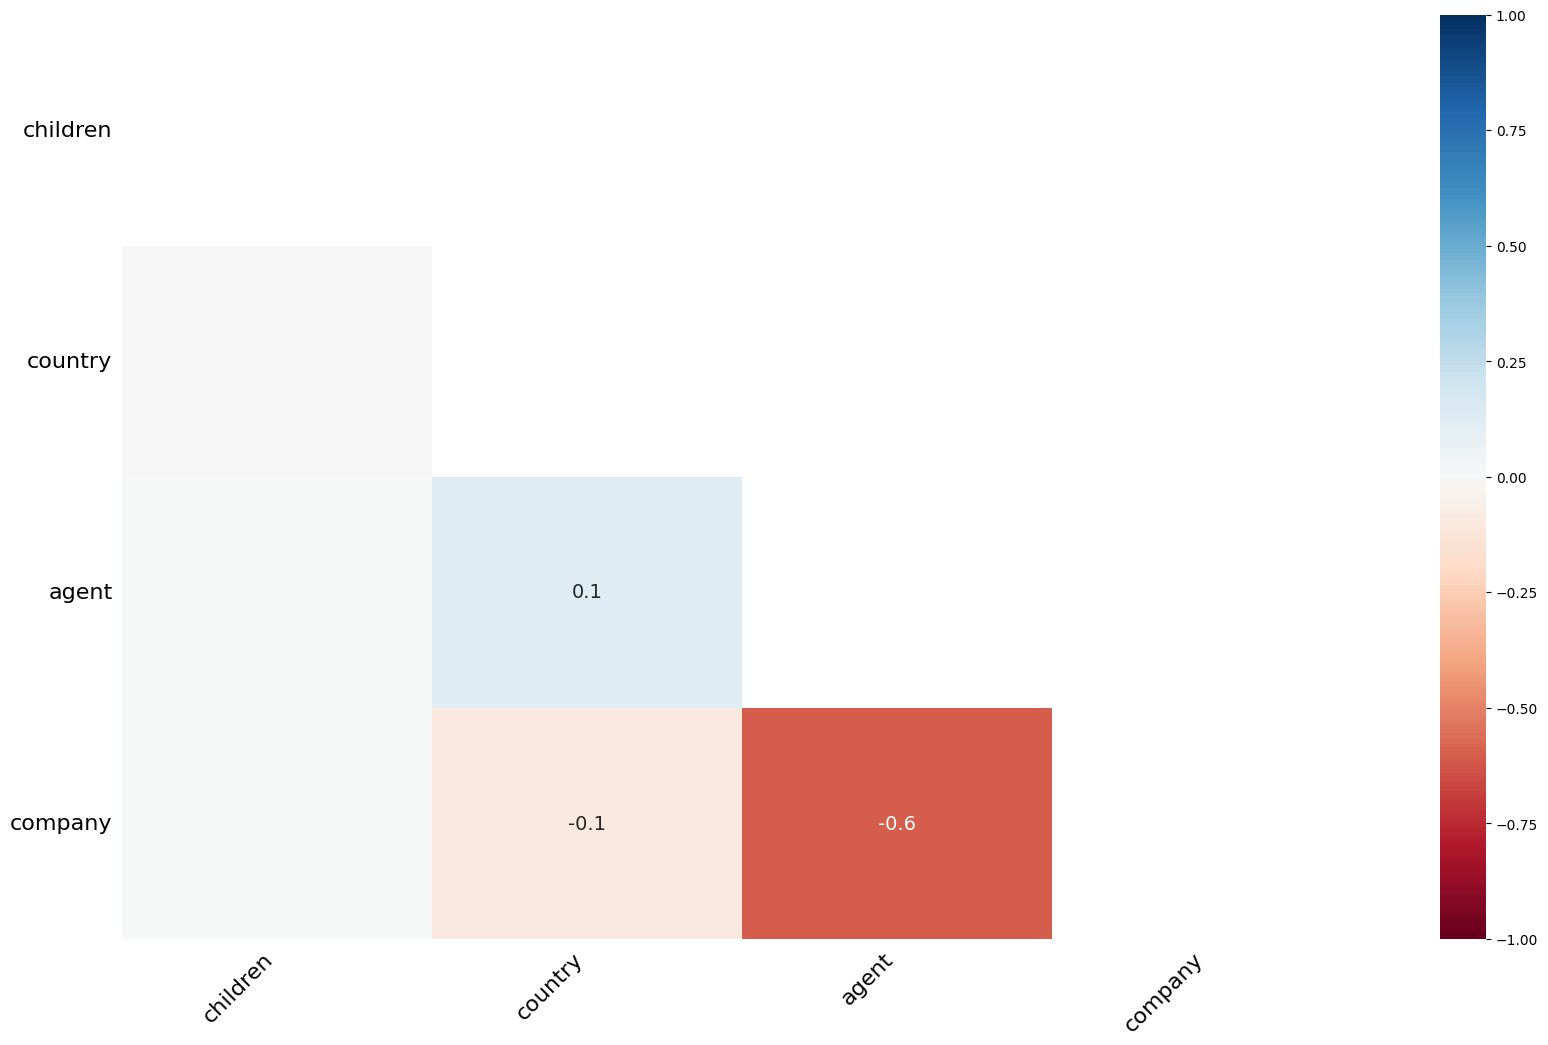

In [109]:
msno.heatmap(df)
plt.show()

### Outliers Findings:
- `adr`: Extreme outliers above ~5000 detected (may be errors or special cases).
- `lead_time`: Very high values (above ~600 days) appear unrealistic.


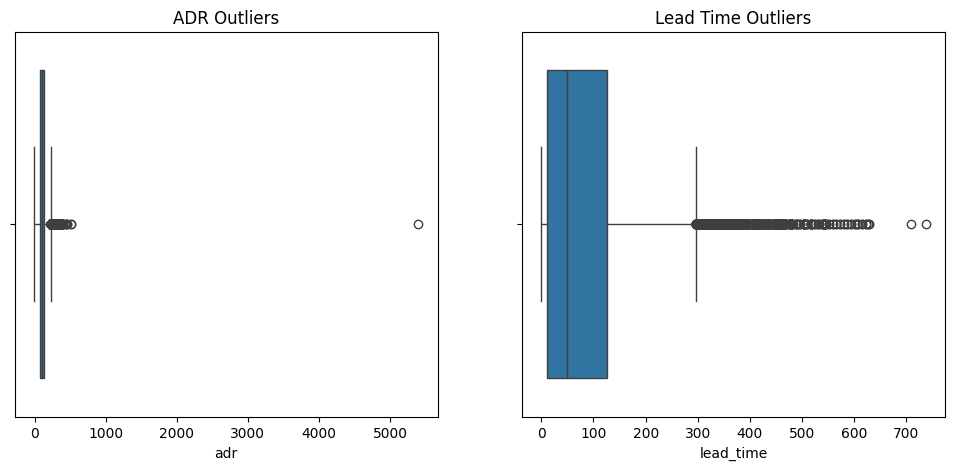

In [110]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.boxplot(x=df['adr'], ax=axes[0])
axes[0].set_title("ADR Outliers")
sns.boxplot(x=df['lead_time'], ax=axes[1])
axes[1].set_title("Lead Time Outliers")
plt.show()

#Data cleaning

### Handling Missing Values
- **Company & Agent**: Missing values imply no company/agent involved, so replaced with `0`.  
- **Country**: Imputed with mode (most frequent country), ensures consistency and avoids creating a new artificial category.  
- **Children**: Median is robust to outliers and works since only a few values were missing.  


In [111]:
#company and agent
df['company'] = df['company'].fillna(0)
df['agent'] = df['agent'].fillna(0)


In [112]:
#country
most_frequent_country = df['country'].mode()[0]
df['country'] = df['country'].fillna(most_frequent_country)


In [113]:
#children
df['children'] = df['children'].fillna(df['children'].median())


In [114]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


###Handling outliers
- **ADR**: Values above 1000 are likely data errors or extreme cases (luxury suites). Capping reduces skewness.  
- **Lead Time**: Bookings >365 days are unrealistic. Capping at 1 year maintains data integrity while controlling outliers.  


In [115]:

df['adr'] = df['adr'].apply(lambda x: 1000 if x > 1000 else x)

df['lead_time'] = df['lead_time'].apply(lambda x: 365 if x > 365 else x)

# Verify new limits
print(f"Max ADR after capping: {df['adr'].max()}")
print(f"Max Lead Time after capping: {df['lead_time'].max()}")


Max ADR after capping: 1000.0
Max Lead Time after capping: 365


###**Data Types**:
   - Converted date fields to datetime.
   - Converted categorical fields to category type.

In [116]:

date_columns = ['reservation_status_date', 'arrival_date_year']
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], errors='coerce')

if {'arrival_date_year','arrival_date_month','arrival_date_day_of_month'}.issubset(df.columns):
    df['arrival_date'] = pd.to_datetime(
        df['arrival_date_year'].astype(str) + '-' +
        df['arrival_date_month'].astype(str) + '-' +
        df['arrival_date_day_of_month'].astype(str),
        errors='coerce'
    )

In [117]:
categorical_cols = ['hotel', 'market_segment', 'distribution_channel', 'is_canceled']
for col in categorical_cols:
    df[col] = df[col].astype('category')


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87396 non-null  category      
 1   is_canceled                     87396 non-null  category      
 2   lead_time                       87396 non-null  int64         
 3   arrival_date_year               87396 non-null  int64         
 4   arrival_date_month              87396 non-null  object        
 5   arrival_date_week_number        87396 non-null  int64         
 6   arrival_date_day_of_month       87396 non-null  int64         
 7   stays_in_weekend_nights         87396 non-null  int64         
 8   stays_in_week_nights            87396 non-null  int64         
 9   adults                          87396 non-null  int64         
 10  children                        87396 non-null  float64       
 11  babies

#Feature Engineering & Preprocessing
- **total_guests** captures booking size (useful for revenue estimation).  
- **total_nights** shows booking duration.  
- **is_family** differentiates family vs. solo/couple bookings.  


In [119]:
#new features
df['total_guests'] = df['adults'] + df['children'] + df['babies']
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df['is_family'] = df.apply(lambda x: "Yes" if (x['children'] > 0 or x['babies'] > 0) else "No", axis=1)



In [120]:
display(df[['adults','children','babies','total_guests','total_nights','is_family']].head())

,adults,children,babies,total_guests,total_nights,is_family
0,2,0.0,0,2.0,0,No
1,2,0.0,0,2.0,0,No
2,1,0.0,0,1.0,1,No
3,1,0.0,0,1.0,1,No
4,2,0.0,0,2.0,2,No


#Encode Categorical Variables
- `reservation_status` and `reservation_status_date` are **post-booking outcomes**.  
- They would not be available at the time of booking, so keeping them = data leakage.  
- Removing ensures realistic modeling.  


In [121]:
from sklearn.preprocessing import OneHotEncoder
df_encoded = pd.get_dummies(df, columns=["meal", "market_segment"], drop_first=True)
df_encoded.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,meal_HB,meal_SC,meal_Undefined,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,False,False,False,False,False,True,False,False,False,False
1,Resort Hotel,0,365,2015,July,27,1,0,0,2,...,False,False,False,False,False,True,False,False,False,False
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,False,False,False,False,False,True,False,False,False,False
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,False,False,False,False,True,False,False,False,False,False
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,False,False,False,False,False,False,False,False,True,False


In [122]:
freq_encoding=df['country'].value_counts(normalize=True)
df['country Freq']=df['country'].map(freq_encoding)
df['country Freq'].head()

,country Freq
0,0.319294
1,0.319294
2,0.119376
3,0.119376
4,0.119376


In [123]:
top=df['country'].value_counts().nlargest(10).index
df['country Top10']=np.where(df['country'].isin(top),df['country'],'Other')
df['country Top10'].value_counts()

,count
country Top10,
PRT,27905
Other,15513
GBR,10433
FRA,8837
ESP,7252
DEU,5387
ITA,3066
IRL,3016
BEL,2081


In [124]:
df = df.drop(columns=["reservation_status", "reservation_status_date"])

#Final Train-Test Split

In [125]:
from sklearn.model_selection import train_test_split
x=df.drop('is_canceled',axis=1)
y=df['is_canceled']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [127]:
display(x_train.shape,x_test.shape)

(69916, 35)

(17480, 35)